In [1]:
from useful_scit.imps2.defs import *
from scipy.signal import find_peaks as fp

In [2]:
ds = xr.open_dataset('/Users/diego/flexpart_management/flexpart_management/releases/v03/data/cluster_series_v3.nc')

In [3]:
df = ds['conc_lab_nc18'].loc[{'normalized':1,'z_column':'ALL'}].reset_coords(drop=True).\
to_dataframe()['conc_lab_nc18'].\
unstack(0)

In [4]:
df.columns

Index(['02_MR', '02_SR', '03_SM', '04_MR', '04_SR', '05_MR', '06_SM', '07_LR',
       '07_SR', '08_LR', '08_SM', '09_MR', '10_LR', '10_SR', '11_MR', '11_SR',
       '12_SM', '12_SR'],
      dtype='object', name='lab_nc18')

In [5]:
    
dic = {}
for cl in df.columns:
    dat = df[cl]
    v = 24
    d2 = dat.rolling(v*4, win_type='gaussian',center=True, min_periods=1).mean(std=int(round(v*.5)))
    mm = d2.mean()

    peaks, properties = fp(
        d2,
        #distance=24,
        #prominence=mm/2,            
        width=24,
        height=mm
             )

    w_med = np.median(properties['widths']/24)
    h_med = np.median(properties['peak_heights'])
    l = len(properties['widths'])
    dic[cl] = dict(
        w_med = w_med,
        h_med = h_med,
        l = l
    )

In [6]:
ddf = pd.DataFrame(dic).T

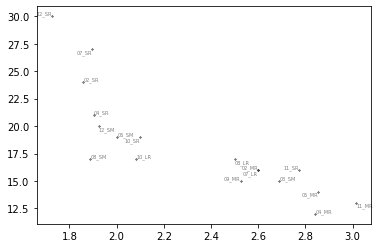

In [7]:
f,ax = plt.subplots()
for l,r in ddf.iterrows():
    def _rc(l): return np.random.choice(l)
#     ax.text(r['w_med'],r['h_med'],l,fontsize=5,alpha=.5)
    ax.text(r['w_med'],r['l'],l,fontsize=5,alpha=.5,
            ha=_rc(['left','right']),
            va=_rc(['top','bottom'])
           )
    ax.scatter(r['w_med'],r['l'],alpha=.5,marker='x',c='k',s=2)
    
    

In [8]:
mm

0.010754693737059994

In [9]:
d2.quantile(.02)*.1

2.2675335243638265e-05

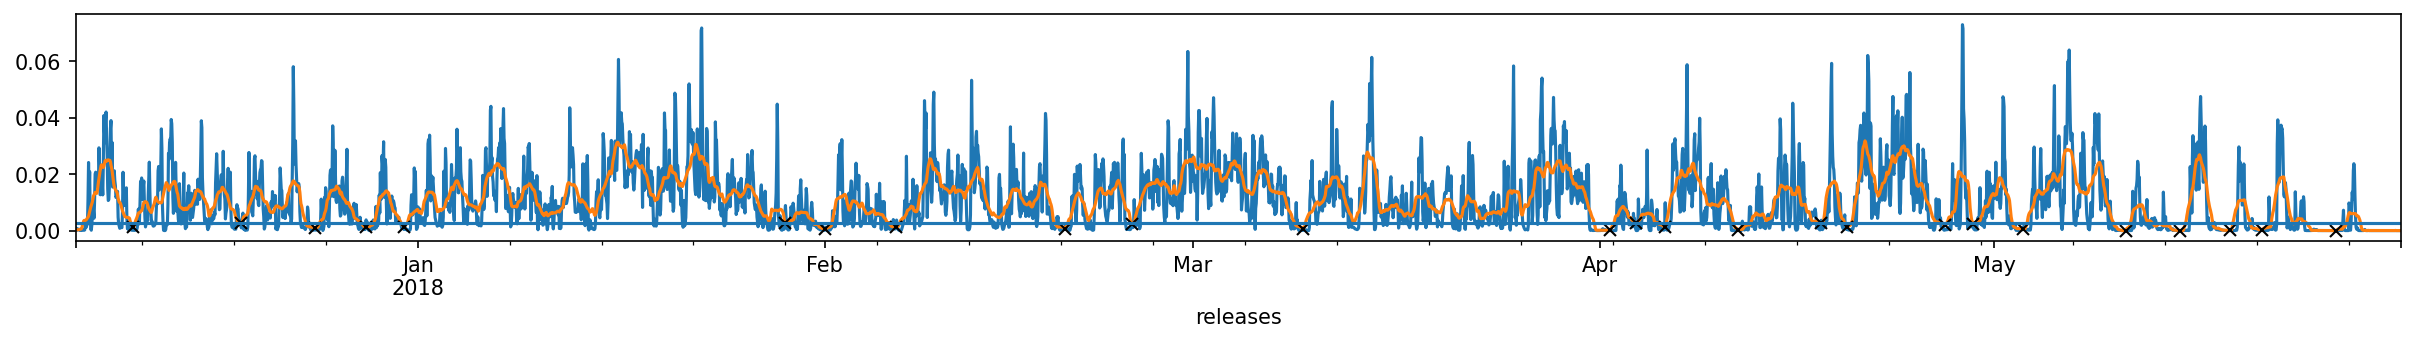

In [10]:
cl = '12_SR'
dat = -df[cl]
v = 24
d2 = dat.rolling(24, 
#                  win_type='gaussian',
                 center=True, 
                 min_periods=1).mean(
    std=int(12)
           )

# d2 = dat 
mm = d2.quantile(.02)*.1

peaks, properties = fp(
        d2,
        #distance=24,
        prominence=abs(1*mm),
#     threshold=abs(.2*mm),
        width=6,
        height=mm,
#         plateau_size = 2
             )

plt.rcParams["figure.dpi"] = 150

f,ax = plt.subplots(figsize=(20,2))
(-dat).plot(ax=ax)
(-d2).plot(ax=ax)
(-d2)[peaks].plot(ax=ax,linewidth=0,marker='x',c='k')
ax.axhline(-mm)

# ax.vlines(x=d2[peaks].index, ymin=d2[peaks] - properties["prominences"],
#            ymax = d2[peaks], color = "C1")
# ax.hlines(y=properties["width_heights"], 
#           xmin=left,
#            xmax=right, color = "C1")

In [11]:
np.median(properties['widths']/24)

2.239001170854787

(array([10.,  8.,  3.,  1.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([ 0.72297451,  1.94019563,  3.15741675,  4.37463787,  5.59185899,
         6.80908011,  8.02630123,  9.24352235, 10.46074346, 11.67796458,
        12.8951857 ]),
 <BarContainer object of 10 artists>)

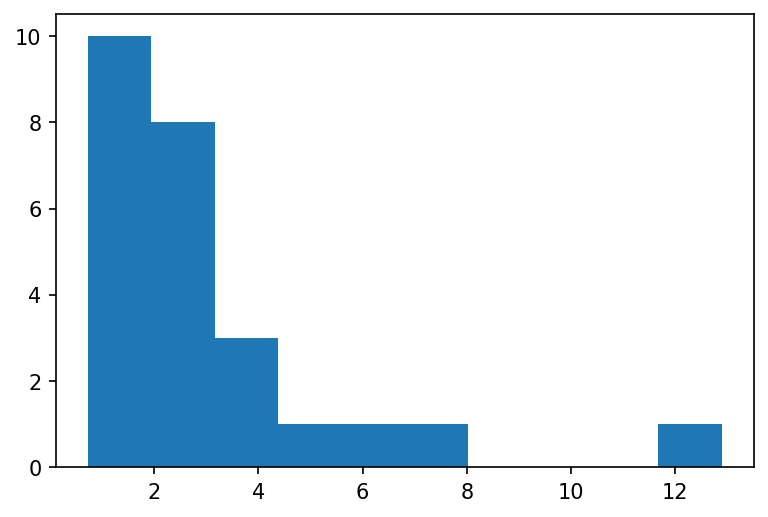

In [12]:
plt.hist(properties['widths']/24)

(array([10.,  8.,  3.,  1.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([ 0.72297451,  1.94019563,  3.15741675,  4.37463787,  5.59185899,
         6.80908011,  8.02630123,  9.24352235, 10.46074346, 11.67796458,
        12.8951857 ]),
 <BarContainer object of 10 artists>)

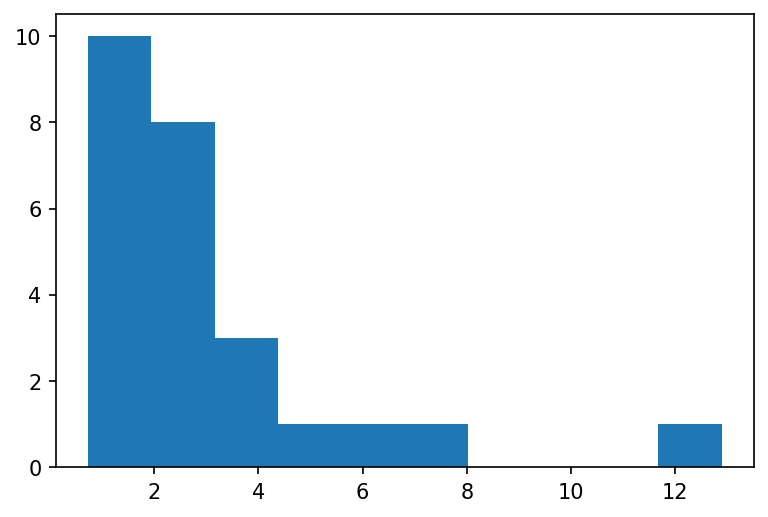

In [13]:
plt.hist(properties['widths']/24)

In [35]:
a = 2
rr = {}
alist = []
dfc = df.copy()
df_residuals = df * 0 
rols = []
for i in range(6):
    dfc = dfc - df_residuals
    a = int(a + a)
    alist.append(a)
    rol = dfc.rolling(window = a, min_periods=1,center=True)
    rm = rol.mean()
    rols.append(rm)
    df_residuals = dfc - rm
    res = (df_residuals/df.mean()).std()
    rr[a] = res.to_dict()

<AxesSubplot:xlabel='releases'>

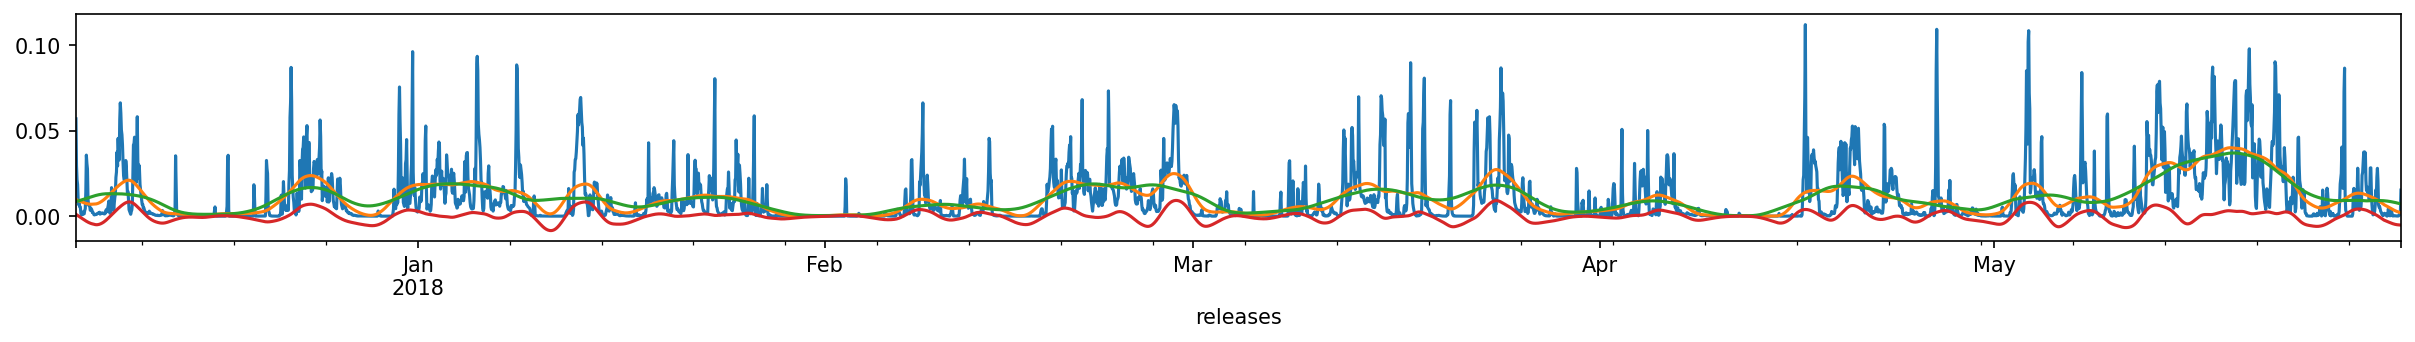

In [91]:
ss = '07_SR'
# ss = '11_MR'
df[ss].plot(figsize=(20,2))
dfc[ss].plot()
rm[ss].plot()
dfcc[ss].plot()

In [92]:
std_o = df[ss].std()
std_o

0.015922948830834557

In [123]:
aa = []
a = 3
for i in range(10): 
    a *=2
    aa.append(a)
    
aa = aa[::-1]

In [124]:
aa

[3072, 1536, 768, 384, 192, 96, 48, 24, 12, 6]

In [130]:
dfc = df.copy()
stds = []
for a in aa:
#     dfc.plot()
    dfc = dfc - dfc.rolling(window = a, min_periods=1,center=True).mean()
    std = dfc.std()
    stds.append(std)   

In [131]:
stds

[lab_nc18
 02_MR    0.135338
 02_SR    0.024809
 03_SM    0.092378
 04_MR    0.125753
 04_SR    0.023296
 05_MR    0.125898
 06_SM    0.055326
 07_LR    0.063291
 07_SR    0.015774
 08_LR    0.057756
 08_SM    0.065777
 09_MR    0.102449
 10_LR    0.073067
 10_SR    0.030425
 11_MR    0.145333
 11_SR    0.039234
 12_SM    0.044127
 12_SR    0.010912
 dtype: float64,
 lab_nc18
 02_MR    0.136727
 02_SR    0.024511
 03_SM    0.093327
 04_MR    0.126026
 04_SR    0.023212
 05_MR    0.126272
 06_SM    0.055178
 07_LR    0.065239
 07_SR    0.015590
 08_LR    0.057603
 08_SM    0.064898
 09_MR    0.099272
 10_LR    0.071912
 10_SR    0.030048
 11_MR    0.142192
 11_SR    0.039442
 12_SM    0.043837
 12_SR    0.010894
 dtype: float64,
 lab_nc18
 02_MR    0.135841
 02_SR    0.024095
 03_SM    0.090697
 04_MR    0.119614
 04_SR    0.022628
 05_MR    0.116053
 06_SM    0.055498
 07_LR    0.063388
 07_SR    0.015385
 08_LR    0.053640
 08_SM    0.059800
 09_MR    0.090195
 10_LR    0.071315
 10_S

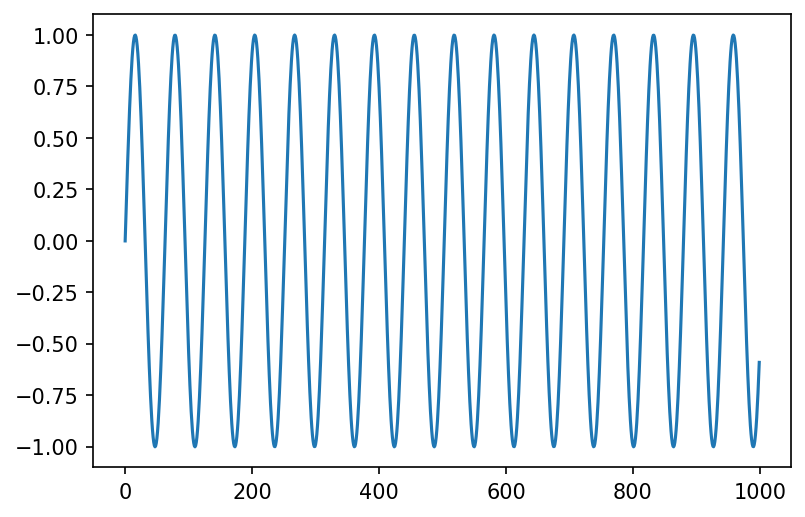

In [140]:
sig   = pd.Series(np.sin(np.arange(0,1000)/10))
plt.plot(sig)

<AxesSubplot:>

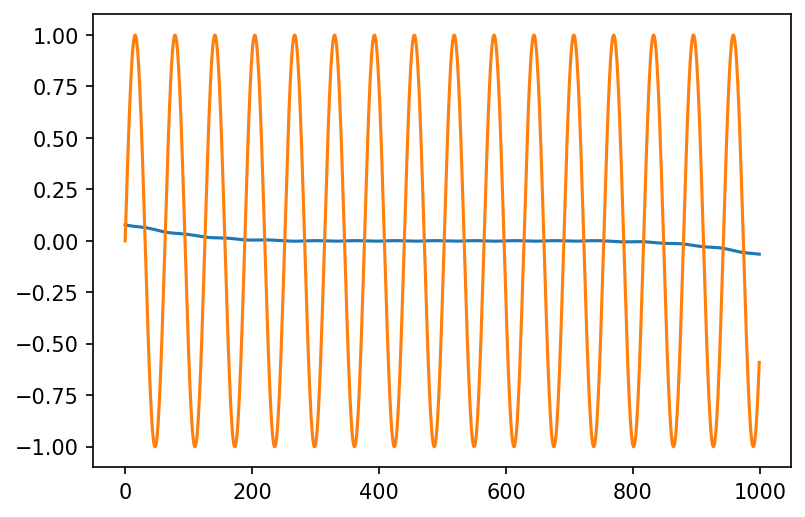

In [189]:
(sig.rolling(window=500,center=True,min_periods=1,win_type='gaussian').mean(std=100)).plot()
sig.plot()

<AxesSubplot:xlabel='releases'>

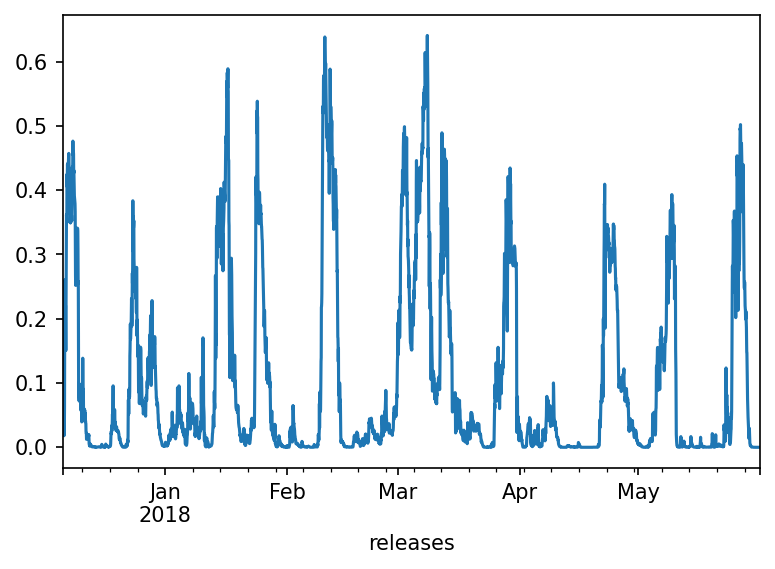

In [46]:
df[ss].plot()

<AxesSubplot:xlabel='releases'>

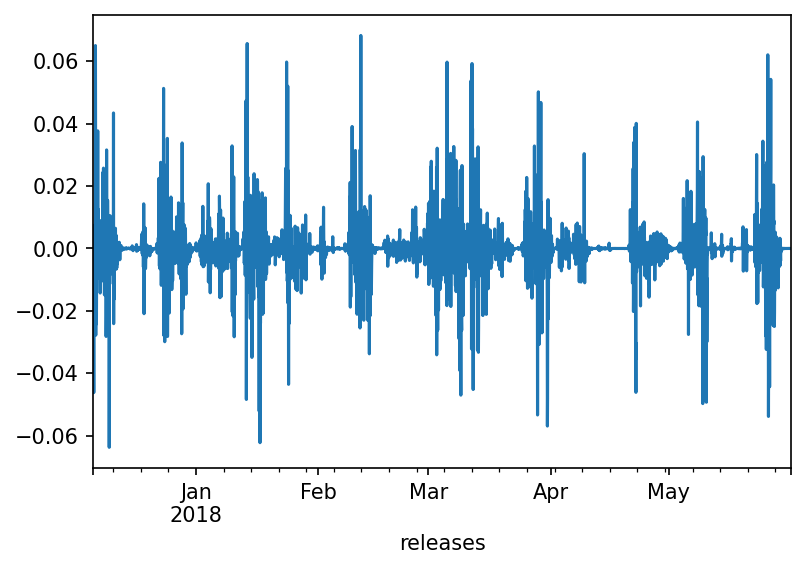

<AxesSubplot:xlabel='releases'>

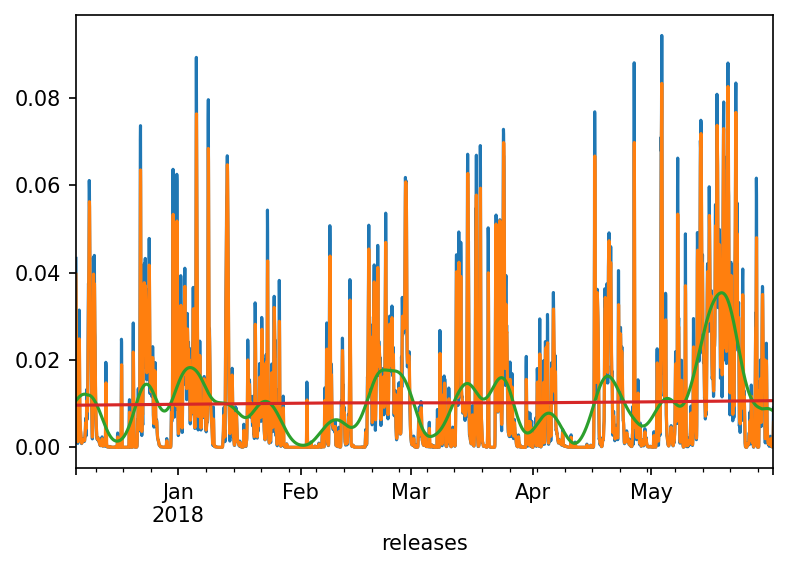

In [715]:

rols[0][ss].plot()
rols[1][ss].plot()
rols[10][ss].plot()
rols[-1][ss].plot()

In [711]:
dd = pd.DataFrame(rr)

In [712]:
col_order = dd.iloc[:,0].sort_values()[::-1].index

In [713]:
xa = dd.loc[col_order].stack().to_xarray()

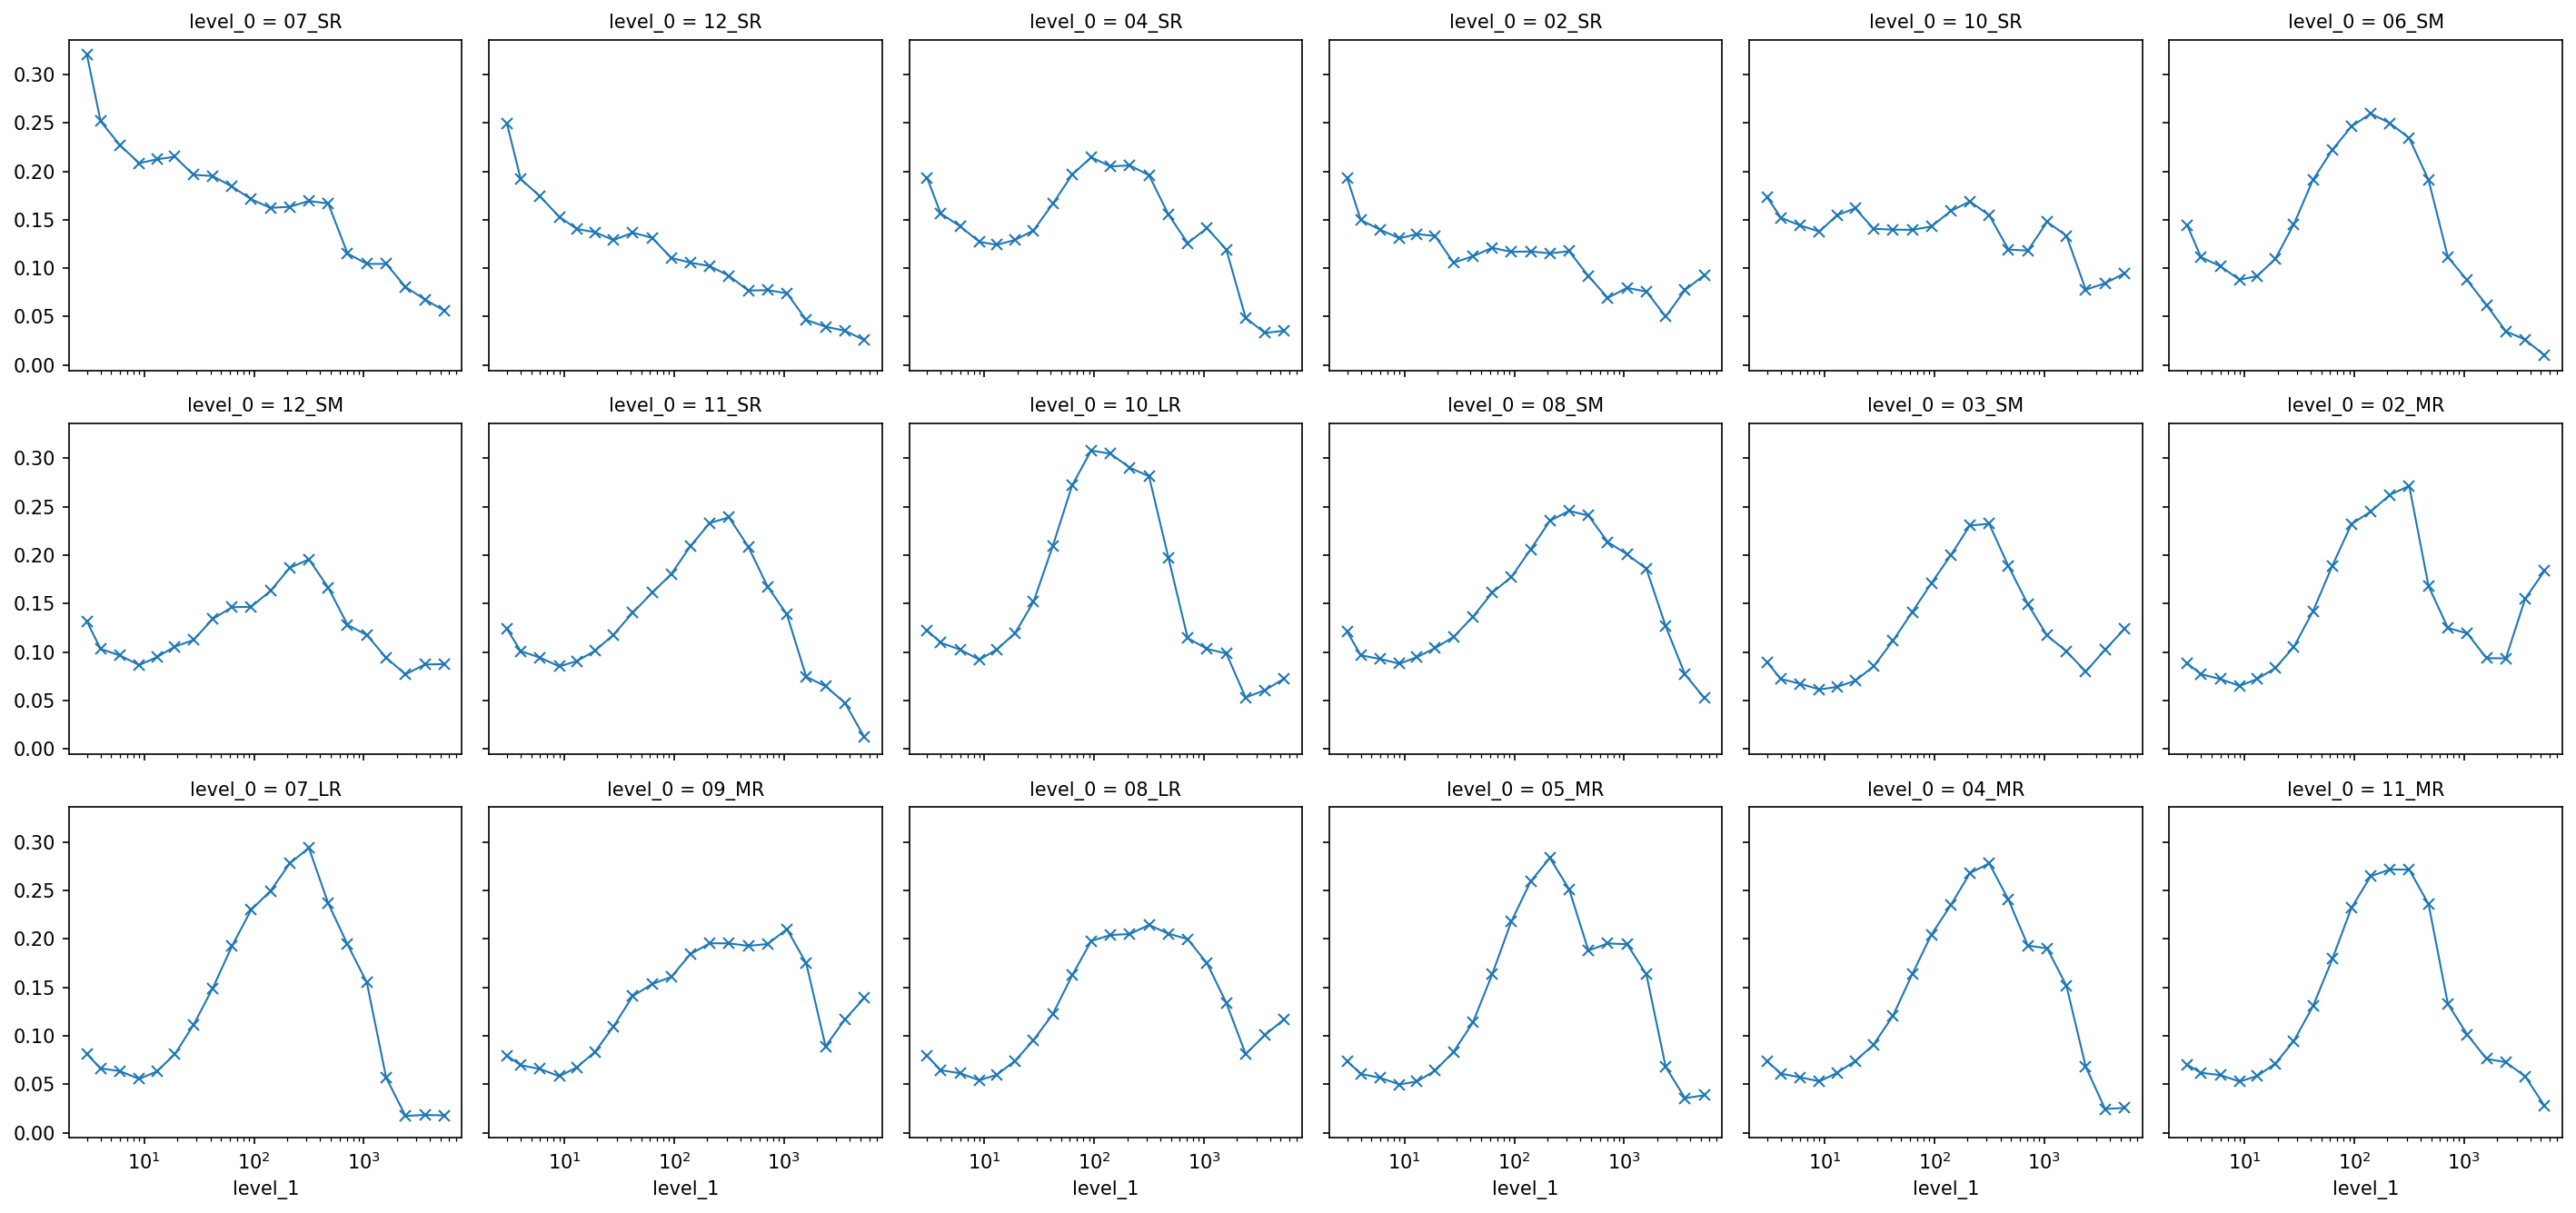

In [714]:
xp = xa.plot(
    col='level_0',col_wrap=6,linewidth=1,marker='x',
    hue='level_0',xscale='log')

In [648]:
for ax in xp.axes.flatten():

array([<AxesSubplot:title={'center':'level_0 = 02_MR'}>,
       <AxesSubplot:title={'center':'level_0 = 02_SR'}>,
       <AxesSubplot:title={'center':'level_0 = 03_SM'}>,
       <AxesSubplot:title={'center':'level_0 = 04_MR'}>,
       <AxesSubplot:title={'center':'level_0 = 04_SR'}>,
       <AxesSubplot:title={'center':'level_0 = 05_MR'}>,
       <AxesSubplot:title={'center':'level_0 = 06_SM'}>,
       <AxesSubplot:title={'center':'level_0 = 07_LR'}>,
       <AxesSubplot:title={'center':'level_0 = 07_SR'}>,
       <AxesSubplot:title={'center':'level_0 = 08_LR'}>,
       <AxesSubplot:title={'center':'level_0 = 08_SM'}>,
       <AxesSubplot:title={'center':'level_0 = 09_MR'}>,
       <AxesSubplot:title={'center':'level_0 = 10_LR'}, xlabel='level_1'>,
       <AxesSubplot:title={'center':'level_0 = 10_SR'}, xlabel='level_1'>,
       <AxesSubplot:title={'center':'level_0 = 11_MR'}, xlabel='level_1'>,
       <AxesSubplot:title={'center':'level_0 = 11_SR'}, xlabel='level_1'>,
       <AxesSubp

In [250]:
def b(m,k,w):
    return ( 
        ( np.sin( np.pi * m * w ) )/ ( m * np.sin( np.pi * w ) )
    )**(2*k)

def w0(m,k):
    cc = ( 0.5 **(0.5*k) )
    
    a = np.sqrt(6)
    b = np.pi
    c = 1 - cc
    d = m**2 - cc
    r = ( a / b ) * np.sqrt( c / d) 
    return r 

In [273]:
1/w0(15,5)

21.195126079167398

In [422]:
1003*np.sqrt(5)/24

93.44900755967872

In [274]:
ra = np.arange(0,100)

<ipython-input-250-b0711e42aee6>:3: RuntimeWarning: invalid value encountered in true_divide
  ( np.sin( np.pi * m * w ) )/ ( m * np.sin( np.pi * w ) )


<AxesSubplot:>

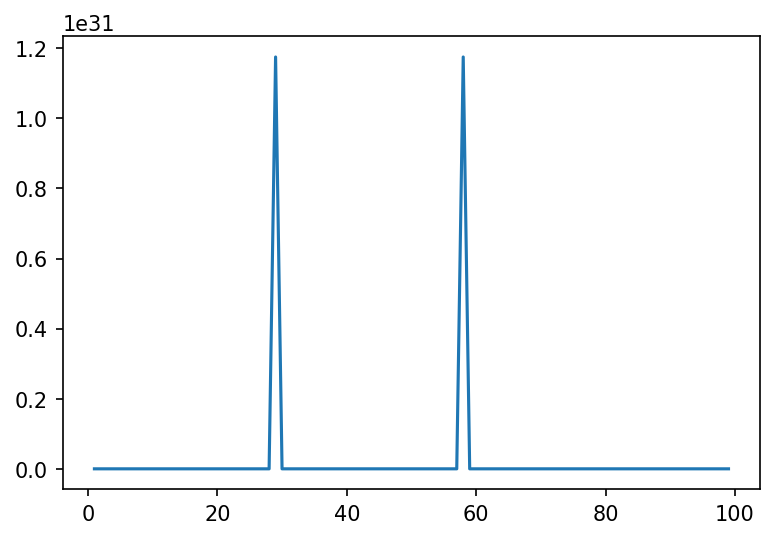

In [278]:
plt.plot(ra,b(3,2,ra)**2)
plt.gca()

In [556]:
def kf(ts, m, k):
    ts1 = ts.copy()
    for kk in range(k):
        ts1 = ts1.rolling(
            m,
            center=True, 
#             min_periods=int(m * 2/3)
            min_periods=1
        ).mean()
    return ts1

In [568]:
do = df['09_MR'].copy()
do = df.copy()
# do = np.log10(do+.00001)

In [721]:
id, du,sy,bl = ll =  0,3*np.sqrt(3)/24,13*np.sqrt(5)/24,103*np.sqrt(5)/24
ll

(0, 0.21650635094610968, 1.211203487812386, 9.596458403436598)

In [776]:
nam = ['0h - 12h','12h - 1.2d','1.2d - 10d','>10d']
nam = ['ID','DU','SY','BL']

In [777]:
ID = do - kf(do,3,3)
DU = kf(do,3,3) - kf(do,13,5)
SY = kf(do,13,5) - kf(do,103,5)
BL = kf(do,103,5) 
# M = kf(do,403,5)

In [787]:
ov = do.var()

In [860]:
ndf = pd.DataFrame()

In [861]:
ndf[nam[0]]=(ID.var()/ov)

In [862]:
ndf[nam[1]]=(DU.var()/ov)

In [863]:
ndf[nam[2]]=(SY.var()/ov)

In [864]:
ndf[nam[3]]=BL.var()/ov
ndf = ndf[ndf.columns[::-1]]

In [865]:
# ndf[nam[4]]=M.var()/ov

In [868]:
# ndf=ndf.sort_values('12h - 1.2d')[::-1]
ndf=ndf.sort_values('DU')[::-1]

In [869]:
ndf1 = pd.melt(ndf,ignore_index=False).reset_index()

In [870]:
ndf1

,lab_nc18,variable,value
0,12_SR,BL,0.120100
1,07_SR,BL,0.163799
2,02_SR,BL,0.229264
3,10_SR,BL,0.297160
4,04_SR,BL,0.230291
...,...,...,...
67,08_LR,ID,0.005585
68,07_LR,ID,0.004803
69,04_MR,ID,0.004397
70,11_MR,ID,0.004345


In [871]:
med=ndf.median(axis=0)
med

BL    0.327731
SY    0.273524
DU    0.048763
ID    0.010588
dtype: float64

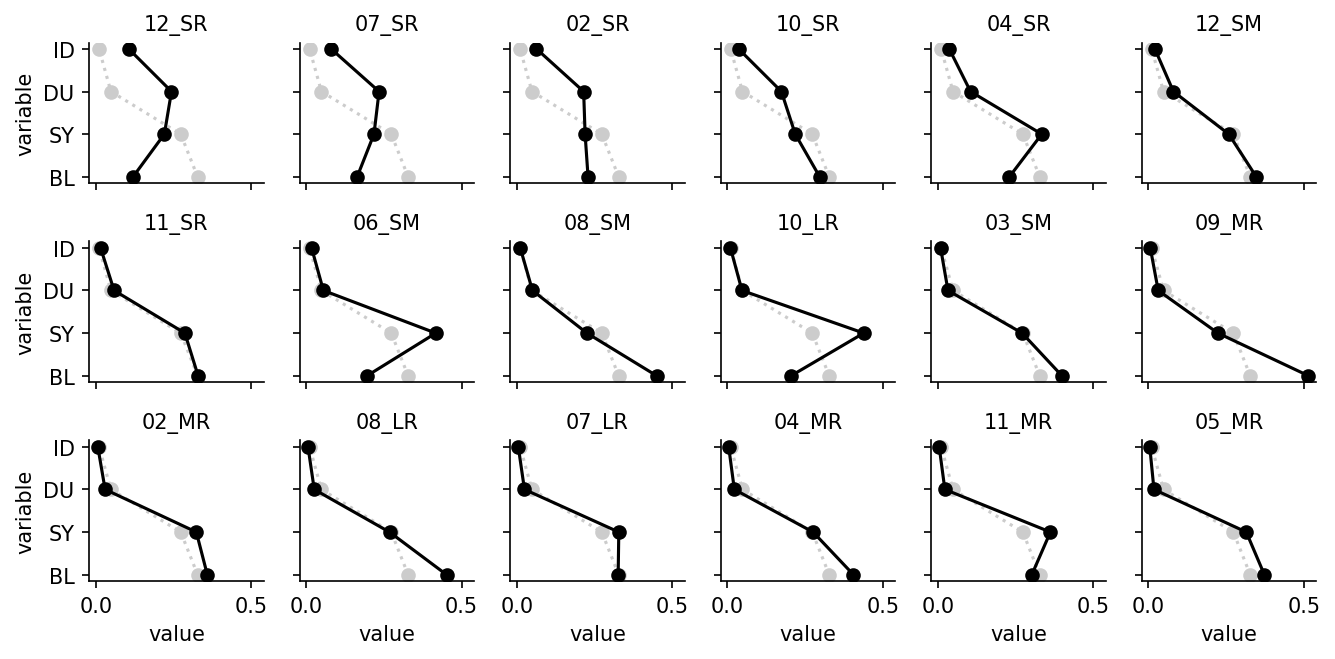

In [878]:
grid = sns.FacetGrid(ndf1, col="lab_nc18", 
#                      hue="lab_nc18", palette="tab20c",
                     col_wrap=6, height=1.5,col_order=ndf.index,aspect=1)
def _pp(xx,yy,**kw): return plt.plot(xx,yy,**kw)
grid.map(_pp, yy=med.index,xx=med, ls=":",marker='o',color='.8')
grid.map(plt.plot, "value",  "variable",marker="o",color='k')
# grid.grid()
grid.set_titles('{col_name}')
# sns.despine(fig=grid.fig,left=True)
grid.fig.savefig('KF_filter.pdf')

A time-series of hourly species (S) data can be presented by:
$$S(t) = ID(t) + DU(t) + SY(t) + BL(t)$$
Kolmogorov Zurbenko filter. Applied as described here:
https://www.sciencedirect.com/science/article/pii/S1352231013003002#appsec1

In [ ]:
np.var(ID['02_MR'])

In [839]:
la='12_SR'

In [841]:
do[la].var()

0.00012141372741993514

In [842]:
res= np.cov([ID[la],DU[la],SY[la],BL[la]])/do[la].var()

<AxesSubplot:>

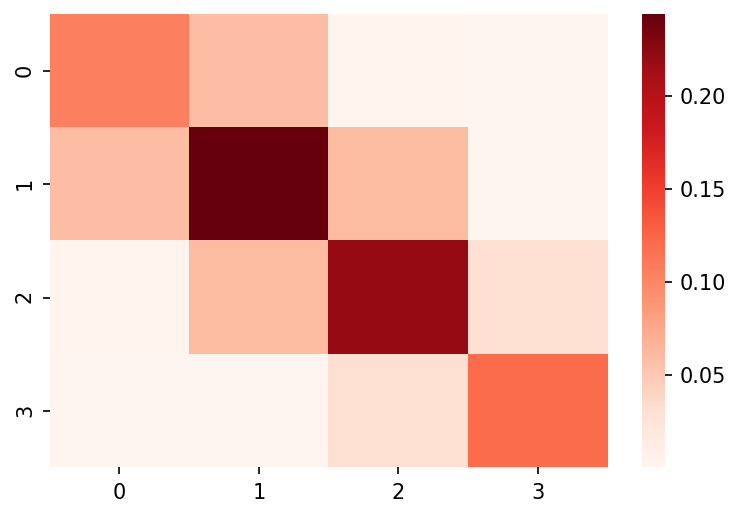

In [845]:
sns.heatmap(res,cmap='Reds')

In [837]:
res.sum()

1.0

In [813]:
pd.concat([ID[['02_MR']],DU[['02_MR']]],axis=1).cov()

lab_nc18,02_MR,02_MR
lab_nc18,,
02_MR,0.000136,0.000096
02_MR,0.000096,0.000618


In [801]:
# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

df

,position,step,walk
0,0,0,0
1,1,1,0
2,1,2,0
3,1,3,0
4,0,4,0
...,...,...,...
95,0,0,19
96,-1,1,19
97,0,2,19
98,1,3,19


In [708]:
# (ID + DU + SY + BL + M  ).plot(figsize=(40,5))
# ID.plot()
# DU.plot()
# SY.plot()
# BL.plot()
# M.plot()

<AxesSubplot:xlabel='releases'>

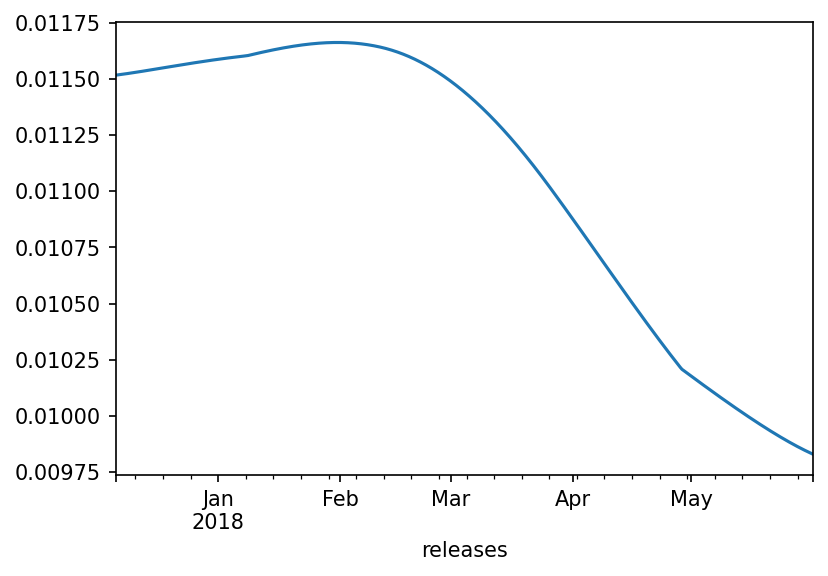

In [709]:
M['12_SR'].plot()